In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregar o dataframe inicial
User = pd.read_excel('EVIO_history_01-02-2023_29-02-2024.xlsx')
User = User[['Start date','Stop date','Duration (min)', 'Total Energy (kWh)', 'Nº cartão EVIO']]

# Remover valores de carregamento de energia inferiores a 1 kWh
User = User[User['Total Energy (kWh)'] >= 1]

User = User[User['Nº cartão EVIO'] == 0]

# Remover valores de duração de carregamento inferiores a 5 minutos
User = User[User['Duration (min)'] >= 5]

User = User[['Start date','Stop date','Duration (min)', 'Total Energy (kWh)']]

print(User)

              Start date           Stop date  Duration (min)  \
31    02/25/2024 | 10:20  02/25/2024 | 10:37          16.500   
35    02/23/2024 | 08:37  02/23/2024 | 11:31         174.000   
52    02/20/2024 | 14:12  02/20/2024 | 20:23         370.850   
61    02/19/2024 | 08:31  02/19/2024 | 11:39         188.083   
91    02/11/2024 | 10:48  02/11/2024 | 11:14          25.983   
...                  ...                 ...             ...   
1536  04/03/2023 | 08:39  04/03/2023 | 13:38         298.967   
1542  03/31/2023 | 08:48  03/31/2023 | 13:36         288.500   
1545  03/31/2023 | 08:41  03/31/2023 | 10:26         105.350   
1548  03/31/2023 | 08:37  03/31/2023 | 08:45           8.283   
1559  03/29/2023 | 08:35  03/29/2023 | 10:26         111.117   

      Total Energy (kWh)  
31                 28.52  
35                 31.10  
52                 27.23  
61                 35.26  
91                 22.06  
...                  ...  
1536               43.80  
1542           

In [2]:
# Convertendo as colunas de data para o formato de data especificado
User['Start date'] = pd.to_datetime(User['Start date'], format='%m/%d/%Y | %H:%M')
User['Stop date'] = pd.to_datetime(User['Stop date'], format='%m/%d/%Y | %H:%M')


# Criando uma nova coluna 'Date' que contém apenas a data (sem a hora)
User['Date'] = User['Start date'].dt.date

# Convertendo os valores de energia para o formato numérico adequado
#User['Total Energy (kWh)'] = User['Total Energy (kWh)'].str.replace(',', '.').astype(float)

# Agrupando os dados pela coluna 'Date' e somando os valores de 'Total Energy (kWh)'
User = User.groupby('Date')['Total Energy (kWh)'].sum().reset_index()

print(User)

           Date  Total Energy (kWh)
0    2023-03-29               12.60
1    2023-03-31               61.66
2    2023-04-03               43.80
3    2023-04-05               51.27
4    2023-04-06               29.33
..          ...                 ...
107  2024-02-11               22.06
108  2024-02-19               35.26
109  2024-02-20               27.23
110  2024-02-23               31.10
111  2024-02-25               28.52

[112 rows x 2 columns]


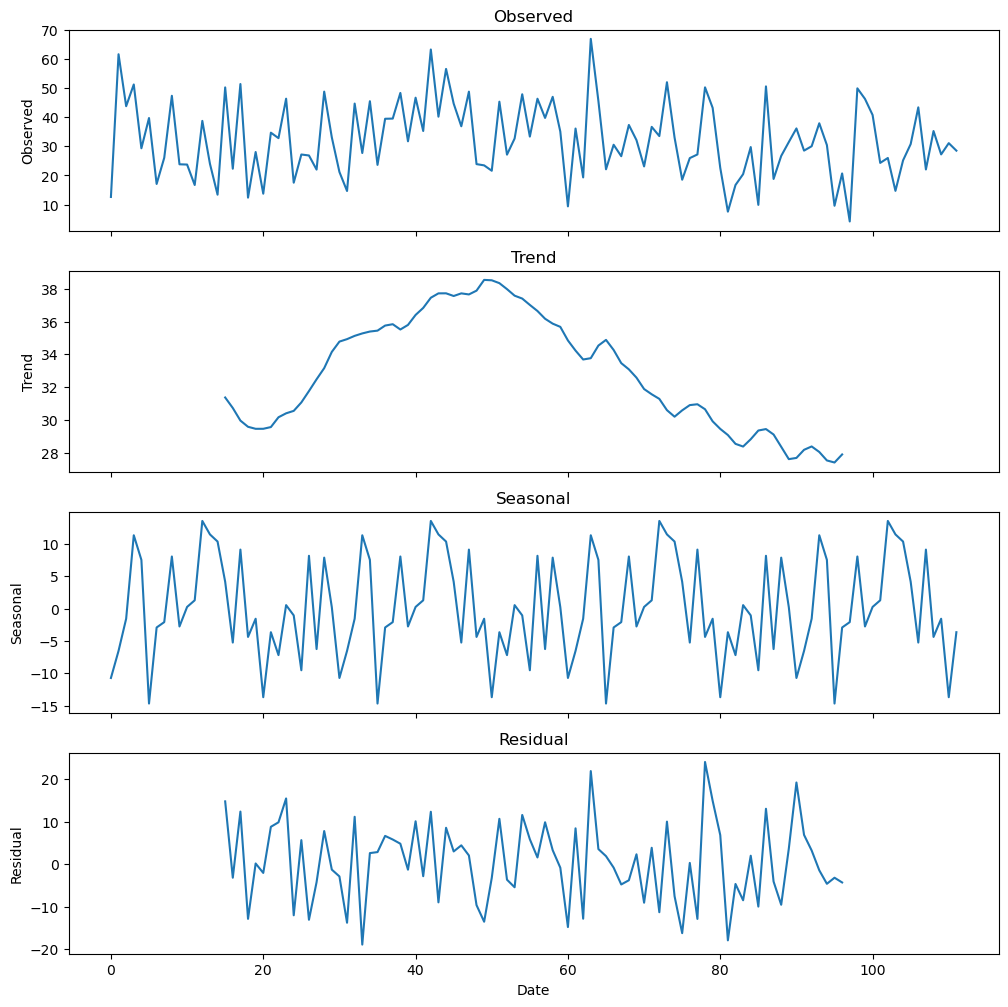

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import math

merged_df = User

# Decompor a série temporal
decomposition = seasonal_decompose(merged_df['Total Energy (kWh)'], model='additive', period=30)

# Plotar a decomposição
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
ax2.set_title('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_title('Residual')

plt.xlabel('Date')
plt.show()

<Figure size 1200x600 with 0 Axes>

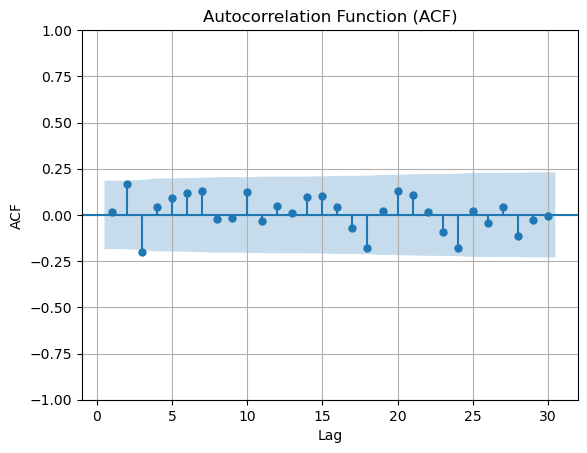

C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

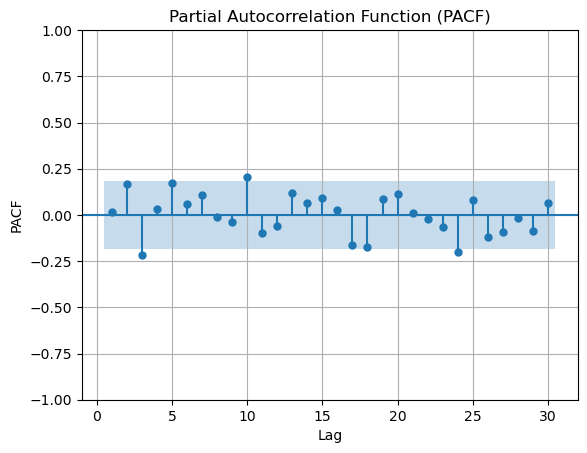

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np

#logg2 = np.diff(np.array(logg))

# Plotar ACF
plt.figure(figsize=(12, 6))
#plot_acf(logg2, lags=30, zero=False)
plot_acf(merged_df['Total Energy (kWh)'], lags=30, zero=False)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plotar PACF
plt.figure(figsize=(12, 6))
#plot_pacf(logg, lags=30, zero=False)
plot_pacf(merged_df['Total Energy (kWh)'], lags=30, zero=False)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

RMSE: 11.10


C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


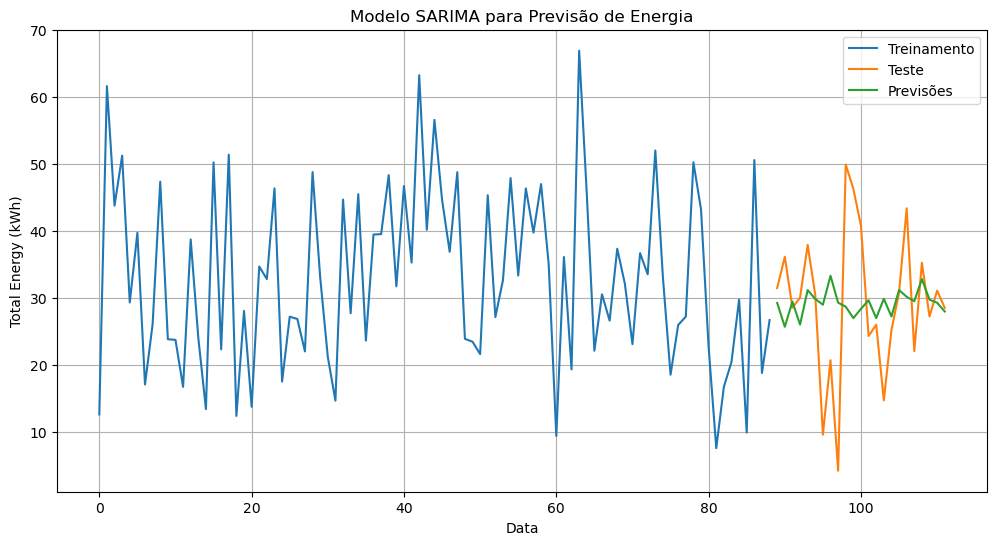

89     29.257148
90     25.689884
91     29.455301
92     26.019689
93     31.175489
94     29.850233
95     28.988025
96     33.321185
97     29.293764
98     28.696049
99     26.985462
100    28.380580
101    29.646518
102    26.991989
103    29.866766
104    27.236906
105    31.184848
106    30.170046
107    29.509810
108    32.827924
109    29.743930
110    29.286230
111    27.976350
Name: predicted_mean, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Usar apenas a coluna 'Total Energy (kWh)' para treinamento
train = merged_df['Total Energy (kWh)']
#train = pd.DataFrame(logg2)

# Dividir em treinamento e teste
train_size = int(len(train) * 0.8)
train_data, test_data = train.iloc[:train_size], train.iloc[train_size:]

# Ajustar o modelo SARIMA
# Exemplo inicial, os parâmetros precisam ser ajustados com base na análise anterior
# Aqui estamos considerando um modelo SARIMA(1, 1, 1)x(1, 0, 1, 12) como exemplo
# Isso significa:
# - p = 1 (ordem do AR)
# - d = 1 (ordem da diferenciação)
# - q = 1 (ordem do MA)
# - P = 1 (ordem do AR sazonal)
# - D = 0 (ordem da diferenciação sazonal)
# - Q = 1 (ordem do MA sazonal)
# - m = 12 (período sazonalidade, aqui assumimos sazonalidade anual com período 12 meses)

#model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(test_data))

# Calcular RMSE
rmse = mean_squared_error(test_data, forecast, squared=False)
print(f'RMSE: {rmse:.2f}')

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Treinamento')
plt.plot(test_data.index, test_data, label='Teste')
plt.plot(test_data.index, forecast, label='Previsões')
plt.title('Modelo SARIMA para Previsão de Energia')
plt.xlabel('Data')
plt.ylabel('Total Energy (kWh)')
plt.legend()
plt.grid(True)
plt.show()

print(forecast)

Date                  datetime64[ns]
Total Energy (kWh)           float64
dtype: object
RMSE: 10.80


C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

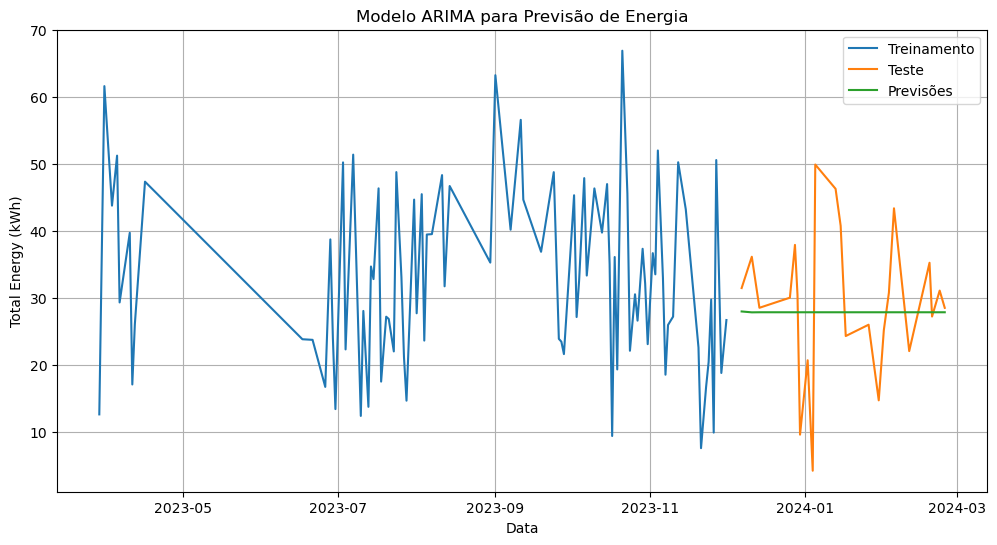

89     27.980788
90     27.850075
91     27.863415
92     27.862054
93     27.862193
94     27.862178
95     27.862180
96     27.862180
97     27.862180
98     27.862180
99     27.862180
100    27.862180
101    27.862180
102    27.862180
103    27.862180
104    27.862180
105    27.862180
106    27.862180
107    27.862180
108    27.862180
109    27.862180
110    27.862180
111    27.862180
Name: predicted_mean, dtype: float64


In [10]:
# Converter a coluna 'Date' para datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Converter a coluna 'Total Energy (kWh)' para float
merged_df['Total Energy (kWh)'] = pd.to_numeric(merged_df['Total Energy (kWh)'], errors='coerce')

# Verificar os tipos das colunas
print(merged_df.dtypes)

# Definir o índice como a coluna 'Date'
merged_df.set_index('Date', inplace=True)

# Dividir em treinamento e teste
train_size = int(len(merged_df) * 0.8)
train = merged_df['Total Energy (kWh)'].iloc[:train_size]
test = merged_df['Total Energy (kWh)'].iloc[train_size:]

# Ajustar o modelo ARIMA
model = ARIMA(train, order=(1, 1, 1))  # Exemplo inicial, ajuste p, d, q conforme necessário
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(test))

# Calcular RMSE
rmse = mean_squared_error(test, forecast, squared=False)
print(f'RMSE: {rmse:.2f}')

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Teste')
plt.plot(test.index, forecast, label='Previsões')
plt.title('Modelo ARIMA para Previsão de Energia')
plt.xlabel('Data')
plt.ylabel('Total Energy (kWh)')
plt.legend()
plt.grid(True)
plt.show()

print(forecast)

Epoch 1/50
3/3 [==============================] - 2s 5ms/step - loss: 0.2534
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 0.2085
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1695
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1353
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1051
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0823
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0633
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0493
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0438
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0437
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 12/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0483
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0

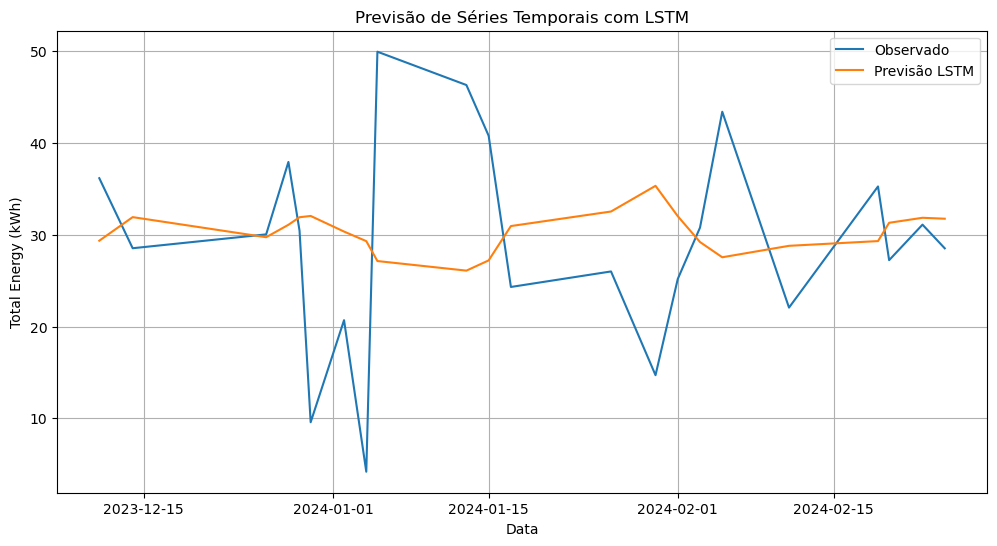

[[29.350592]
 [31.919315]
 [29.729195]
 [31.083748]
 [31.907694]
 [32.046402]
 [30.34608 ]
 [29.301947]
 [27.133638]
 [26.089865]
 [27.203466]
 [30.945526]
 [32.530197]
 [35.329178]
 [32.02082 ]
 [29.202917]
 [27.545067]
 [28.792566]
 [29.308598]
 [31.301746]
 [31.847843]
 [31.745396]]


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Usar apenas a coluna 'Total Energy (kWh)' para treinamento
data = merged_df['Total Energy (kWh)'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Função para criar sequências temporais para o LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definir o comprimento da sequência (por exemplo, 5 dias anteriores para prever o próximo dia)
seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Dividir em conjunto de treinamento e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para o formato [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### Construção do Modelo LSTM

model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Fazer previsões
predictions = model.predict(X_test)

# Inverter a escala das previsões para desnormalizar
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.2f}')

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index[-len(y_test):], y_test, label='Observado')
plt.plot(merged_df.index[-len(predictions):], predictions, label='Previsão LSTM')
plt.title('Previsão de Séries Temporais com LSTM')
plt.xlabel('Data')
plt.ylabel('Total Energy (kWh)')
plt.legend()
plt.grid(True)
plt.show()

print(predictions)